# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score
%matplotlib inline

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [5]:
kmeans = cluster.KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_)
print("Model 1 Silhouette Score: {}".format(silhouette_score(X, kmeans.labels_)))

Model 1 Silhouette Score: 0.5398971441034114


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_)
print("Model 1 Silhouette Score: {}".format(silhouette_score(X, kmeans.labels_)))

Model 1 Silhouette Score: 0.5489993239795674


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_)
print("Model 1 Silhouette Score: {}".format(silhouette_score(X, kmeans.labels_)))

Model 1 Silhouette Score: 0.5711381937868837


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

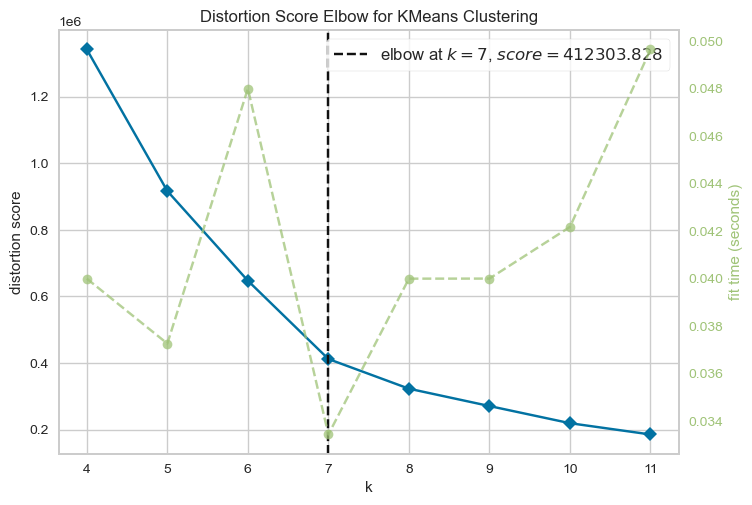

In [8]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# distortion score
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='distortion')
visualizer.fit(X)
visualizer.poof();

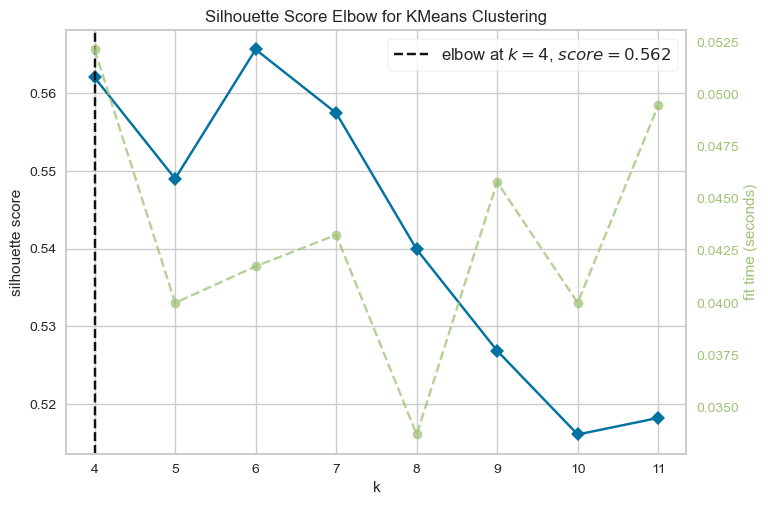

In [9]:
# silouette score
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette')
visualizer.fit(X)
visualizer.poof();


c:\Users\Paula\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\Paula\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


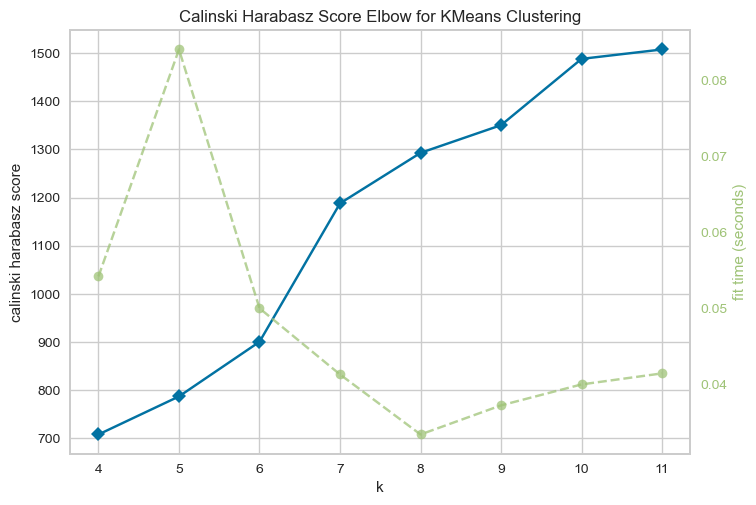

In [31]:
# calinski_harabasz score
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='calinski_harabasz')
visualizer.fit(X)
visualizer.poof();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Train KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)

kmeans_silhouette_score = silhouette_score(X, kmeans_model.labels_)
print("KMeans Silhouette Score: {}".format(kmeans_silhouette_score))

KMeans Silhouette Score: 0.5711381937868837


In [47]:
# Train Agglomerative Clustering model
agglo_model = AgglomerativeClustering(n_clusters=3)
agglo_model.fit(X)


AgglomerativeClustering(n_clusters=3)

In [43]:
# Compute Agglomerative Clustering model's Silhouette Score
agglo_silhouette_score = silhouette_score(X, agglo_model.labels_)
print("Agglomerative Clustering Silhouette Score: {}".format(agglo_silhouette_score))

Agglomerative Clustering Silhouette Score: 0.5644796401732067


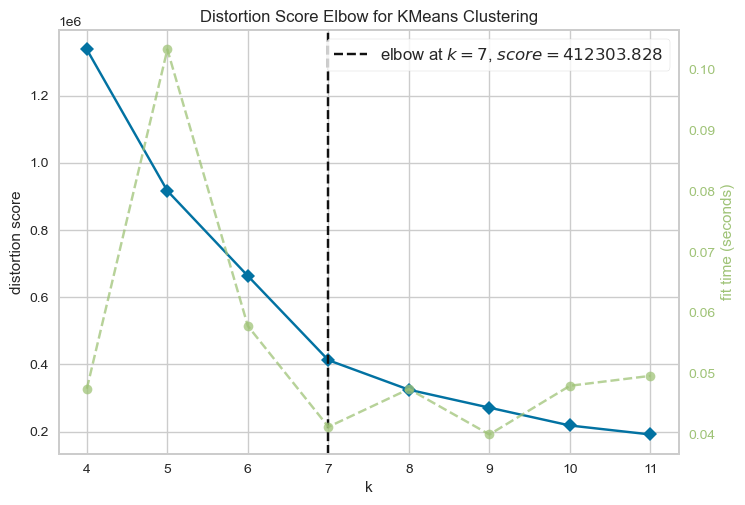

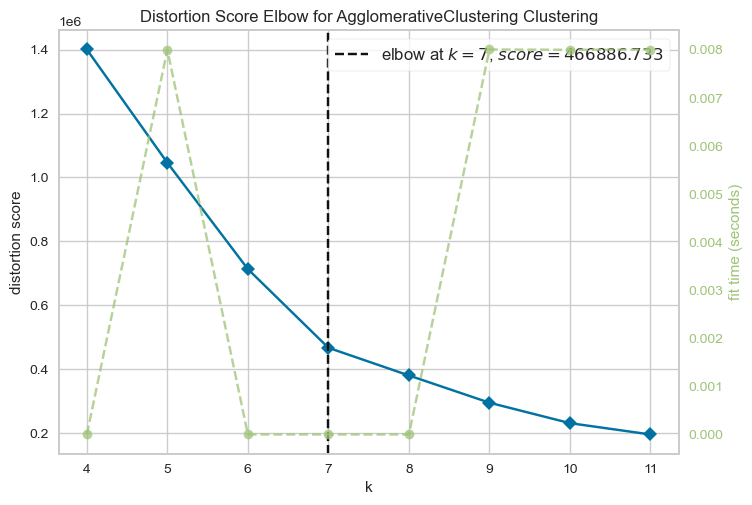

In [50]:
# Perform elbow test with KMeans
kmeans_model = KMeans()
kmeans_visualizer = KElbowVisualizer(kmeans_model, k=(4, 12))
kmeans_visualizer.fit(X)
kmeans_visualizer.show();

# Perform elbow test with AgglomerativeClustering
agglo_model = AgglomerativeClustering()
agglo_visualizer = KElbowVisualizer(agglo_model, k=(4, 12))
agglo_visualizer.fit(X)
agglo_visualizer.show();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

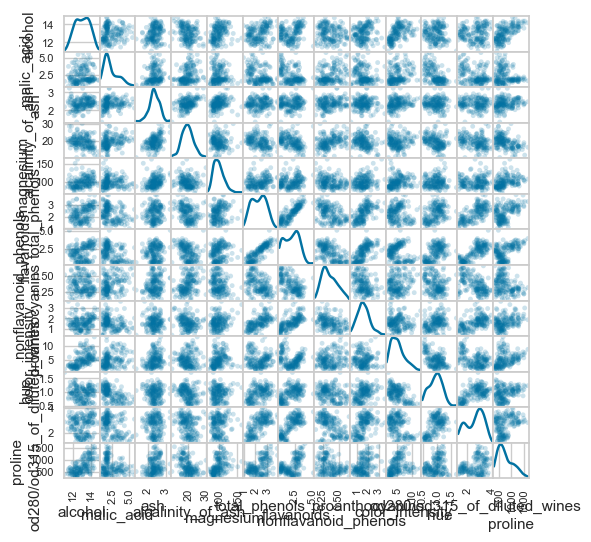

In [28]:
# create a plot scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha=0.2, figsize=(6, 6), diagonal='kde');

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

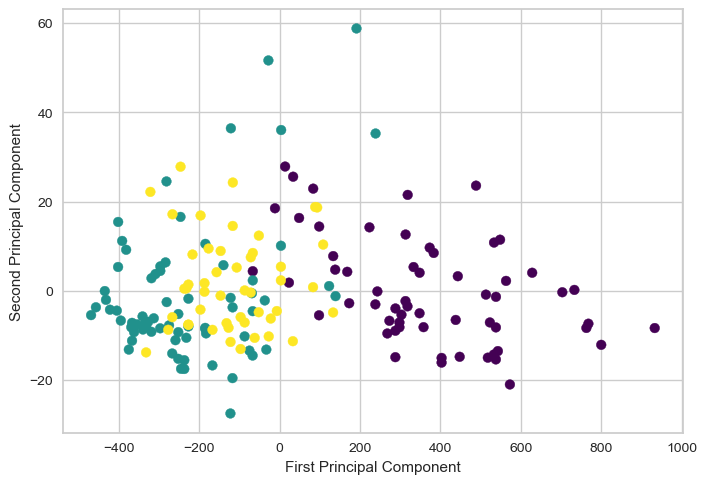

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');


## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

c:\Users\Paula\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Paula\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Paula\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Paula\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Paula\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Paula\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: Future

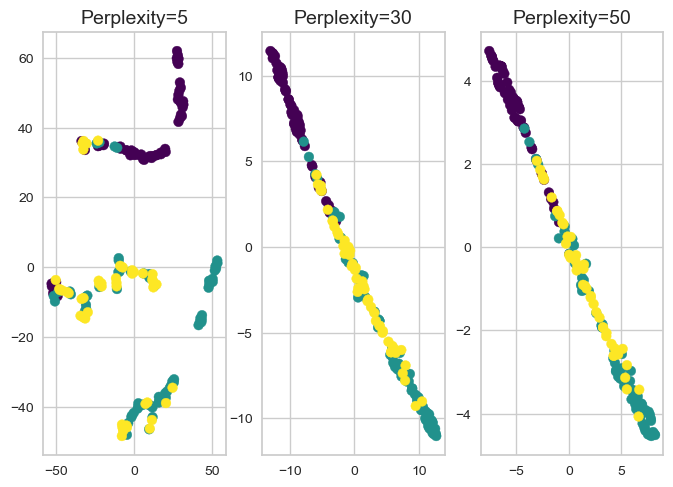

In [38]:

from sklearn.manifold import TSNE
for i, perplexity in enumerate([5, 30, 50]):
    plt.subplot(1, 3, i + 1)
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.title("Perplexity={}".format(perplexity), fontsize=14);